# How to define Personalized driver models

- **Personalized driver models** are learned from the data collected from the specific driver. For instance, the personalized model of driver \#1 is learned using the driving data collected from driver \#1.
- **Average driver models** are learned using the data collected from other nine drivers.

In [2]:
# Driving style 
# PCA
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

TIME_VARIANTS = [3]
def get_data(driver_i):
    pickle_name = 'pickle/driver_data_' + str(TIME_VARIANTS[0]) + '.pkl'
    with open(pickle_name, "rb") as f:
        DATA = pickle.load(f)
    
    dynamic_drv = DATA[driver_i]['dynamic_drv']
    surr_zone = DATA[driver_i]['surr_zones']
    driver_id = DATA[driver_i]['driver_id']
    
    o = dynamic_drv.drop("velocity", axis=1) # observed information
    v = dynamic_drv.velocity # hidden variable: velocity
    x_columns = dynamic_drv.columns
        
    return driver_id, dynamic_drv, surr_zone, o, v, x_columns


In [5]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
from sklearn.model_selection import train_test_split

def driver_model_vae():
    plt.figure(figsize=(15, 10))
    for i_driver in range(10):
        driver_id, dynamic_drv, surr_zone, o, velocity, x_columns = get_data(i_driver)
        print(len(o))
        print(len(surr_zone))
        
        
driver_model_vae()
         

12352
12352
11239
11239
7554
7554
7575
7571
11646
11646
10768
10768
10934
10934
11840
11838
15278
15278
9350
9350


<Figure size 1080x720 with 0 Axes>

#### 3. Simulation
- Lane change scenarios

In [ ]:
gmm5= [14.646659083823453, 15.404403797825733, 9.653483429250576, 11.229009796558874, 12.126119618255698, 8.806966396290479, 13.012201020973853, 17.698201643430664, 14.019224156260467, 9.598311021815361]

#### 4. Personalized data driven control
1. Personalized MPC
2. Risk adaptive control
3. Data-driven control
  - Training phase
  - Inference phase


#### 5.Experimental result
- KL divergence
- MSE
- Interrupting time
- Subjective risk evaluation

(array([], dtype=float64), [])


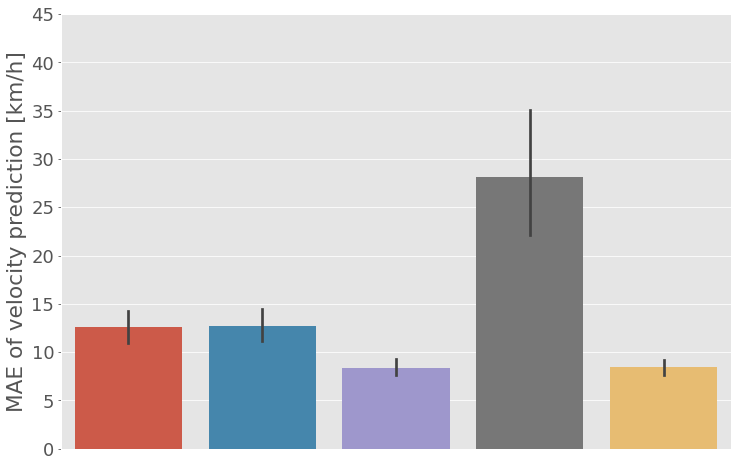

In [144]:
gmm5 = [14.646659083823453, 15.404403797825733, 9.653483429250576, 11.229009796558874, 12.126119618255698, 8.806966396290479, 13.012201020973853, 17.698201643430664, 14.019224156260467, 9.598311021815361]
gmm7 = [14.77711253651537, 15.7606110071174, 9.809528691839157, 11.46399618763712, 11.68914429257308, 9.239177267709803, 12.848740596815745, 17.4794343270186, 13.873162997168574, 9.622553383435008]
gmm9 = [10.626325216259287, 8.081849482607474, 7.473894650810207, 8.582976622193318, 8.504851372525048, 5.9205303252312, 9.111075841851997, 8.228119700514371, 10.395547048863449, 7.045034790832809]
vae = [29.36996928423071, 45.94260680401793, 18.151828348841043, 21.670330131313293, 24.63292380938292, 19.010422420574777, 26.430226019813077, 51.83459378005133, 26.402662944260065, 17.74712687875769]
cvae= [10.545253694096584, 8.167437699236263, 7.746229849459656, 8.748753531369287, 8.508049546648605, 5.879570445573125, 9.055804601200654, 8.169513593660735, 10.369184959433651, 7.010516066724594]


data = [gmm5,gmm7,gmm9,vae,cvae]
plt.figure(figsize=(12,8))
sns.barplot(data=data)
plt.ylabel('MAE of velocity prediction [km/h]')
plt.rcParams["font.size"] = 18
plt.ylim([0,45])
plt.xticks([])
print(plt.xticks())
plt.savefig('velocity_comparison.png')




